# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np

In [2]:
## Load the data into a pandas DataFrame
df = pd.read_csv("../assets/Iowa_Liquor_sales_sample_10pct.csv")
## set date to datetime so we can extract year and month
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [3]:
#No need for gallons since bottle volume is in mL
df.drop("Volume Sold (Gallons)", axis=1, inplace=True)

In [4]:
#rename the columns
cols = ["date","store","city","zip","county_num","county","cat", "cat_name","vendor","item_num","item",
       "bottle_vol","bottle_cost","bottle_cost_retail", "bottles_sold", "sales","volume_sold"]

df.columns = cols

In [5]:
df.isnull().sum()

date                     0
store                    0
city                     0
zip                      0
county_num            1077
county                1077
cat                     68
cat_name               632
vendor                   0
item_num                 0
item                     0
bottle_vol               0
bottle_cost              0
bottle_cost_retail       0
bottles_sold             0
sales                    0
volume_sold              0
dtype: int64

In [6]:
#let's see the percentage of our missing values
(df["county_num"].isnull().sum())/float(df.shape[0])

0.0039748297687807943

In [7]:
#since the highest features with missing values are only around 4% of our data, we can just drop the rows with
#these missing values
df.dropna(inplace=True)

In [8]:
#we remove $ for all the dollar columns
df["bottle_cost"] = [i[1:] for i in df["bottle_cost"]]
df["bottle_cost_retail"] = [i[1:] for i in df["bottle_cost_retail"]]
df["sales"] = [i[1:] for i in df["sales"]]

#convert object costs to numeric
df["bottle_cost"] = pd.to_numeric(df["bottle_cost"])
df["bottle_cost_retail"] = pd.to_numeric(df["bottle_cost_retail"])
df["sales"] = pd.to_numeric(df["sales"])

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
df['year'] = df['date'].dt.year
df["month"] = df["date"].dt.month

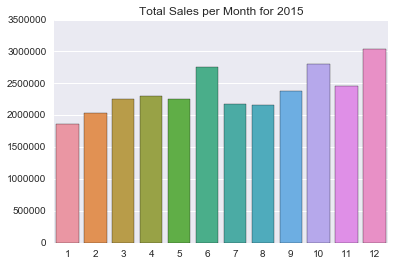

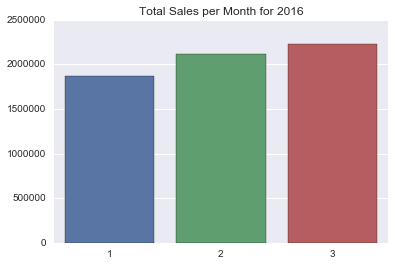

In [11]:
##2015 data
dff15 = df[df["year"]==2015]
months15 = np.sort(dff15["month"].unique()).tolist()

dff15 = dff15.groupby(["month"]).sales.sum().tolist()

sns.plt.title('Total Sales per Month for 2015')
sns.barplot(x=months15,y=dff15)
plt.show()

##2016 data
dff16 = df[df["year"]==2016]
months16 = np.sort(dff16["month"].unique()).tolist()

dff16 = dff16.groupby(["month"]).sales.sum().tolist()

sns.plt.title('Total Sales per Month for 2016')
sns.barplot(x=months16,y=dff16)
plt.show()

In [12]:
df15 = df[df["year"]==2015]
df16 = df[df["year"]==2016]

In [13]:
dfs = df15.groupby(["store", "month"]).sales.sum()

df1 = pd.DataFrame(dfs)
df1 = df1.unstack(level=-1)

#volume sold
dfv1 = pd.DataFrame(df15.groupby("store").volume_sold.sum())
#total sales per store
dft1 = pd.DataFrame(df15.groupby("store").sales.sum())
#total number of bottles sold
dfb1 = pd.DataFrame(df15.groupby("store").bottles_sold.mean())

#concatenate
agg_df = pd.concat([df1,dfv1,dft1,dfb1], axis=1)
agg_df.fillna(value=0, inplace=True)

In [14]:
filcols = ["jan", "feb", "mar","apr","may","jun","jul","aug","sep","oct","nov","dec", "vol_sold", "total", "bottles_sold"]

agg_df.columns = filcols

In [15]:
agg_df["first"] = agg_df.jan + agg_df.feb + agg_df.mar
#agg_df["all_qtr"] = agg_df.first + agg_df.sec + agg_df.third + agg_df.fourth

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

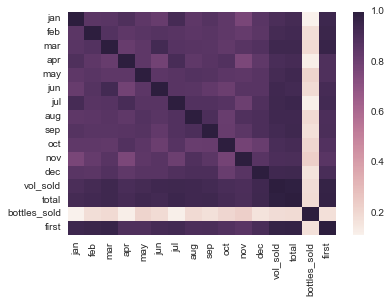

In [16]:
sns.heatmap(agg_df.corr())

In [17]:
dfdummies = pd.get_dummies(df["county"])
countiesdf = pd.concat([df["store"], dfdummies], axis=1)
countiesdf.index = countiesdf["store"]
countiesdf.drop("store",axis=1,inplace=True)
#we might need this
dummies = dfdummies.columns.tolist()

In [18]:
countiesdf.drop("Polk", axis=1, inplace=True)

In [20]:
combined = pd.merge(countiesdf, agg_df, how='inner',left_index=True,right_index=True)
combined.drop_duplicates(inplace=True)

In [22]:
dfsm = df16.groupby(["store", "month"]).sales.sum()

df2 = pd.DataFrame(dfsm)
df2 = df2.unstack(level=-1)

#volume sold
dfv2 = pd.DataFrame(df16.groupby("store").volume_sold.mean())
#total sales per store
dft2 = pd.DataFrame(df16.groupby("store").sales.sum())
#total number of bottles sold
dfb2 = pd.DataFrame(df16.groupby("store").bottles_sold.mean())

#concatenate
agg_df2 = pd.concat([df2,dfv2,dft2,dfb2], axis=1)
agg_df2.fillna(value=0, inplace=True)

filcols2 = ["jan", "feb", "mar","vol_sold", "total", "bottles_sold"]

agg_df2.columns = filcols2

agg_df2["first"] = agg_df2.jan + agg_df2.feb + agg_df2.mar

combined_2 = pd.merge(countiesdf, agg_df2, how='inner',left_index=True,right_index=True)
combined_2.drop_duplicates(inplace=True)

In [24]:
#one df with our whole dataset with the same features
dfs3 = df.groupby(["store", "month"]).sales.sum()
df3 = pd.DataFrame(dfs3)
df3 = df3.unstack(level=-1)
#volume sold
dfv3 = pd.DataFrame(df.groupby("store").volume_sold.mean())
#total sales per store
dft3 = pd.DataFrame(df.groupby("store").sales.sum())
#total number of bottles sold
dfb3 = pd.DataFrame(df.groupby("store").bottles_sold.mean())

#concatenate
agg_df3 = pd.concat([df3,dfv3,dft3,dfb3], axis=1)
agg_df3.fillna(value=0, inplace=True)

agg_df3.columns = filcols
agg_df3["first"] = agg_df3.jan + agg_df3.feb + agg_df3.mar

combined_3 = pd.merge(countiesdf, agg_df3, how='inner',left_index=True,right_index=True)
combined_3.drop_duplicates(inplace=True)

In [26]:
months = ["jan", "feb", "mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

combined_2.drop(months[0:3],axis=1, inplace=True)
combined.drop(months,axis=1, inplace=True)
combined_3.drop(months,axis=1, inplace=True)

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [59]:
from sklearn import datasets, linear_model,preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, r2_score, mean_squared_error
from itertools import combinations
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import LassoCV

In [109]:
def runLinear():
    scores = {}
    global xs, ys, X_test, y_test
    xs = preprocessing.scale(xs)
    ys = preprocessing.scale(ys)
    
    X_test = preprocessing.scale(X_test)
    y_test = preprocessing.scale(y_test)
    
    lr = linear_model.LinearRegression()
    model = lr.fit(xs, ys)
    predictions = model.predict(X_test)

    lin = [np.sqrt(mean_squared_error(y_test, predictions)), r2_score(y_test, predictions)]
    scores["linear"] = lin

    ridgeregcv = linear_model.RidgeCV(alphas=[0.1, 1, .001, .01, 10]) # Try different alphas
    model = ridgeregcv.fit(xs, ys)
    predictions = ridgeregcv.predict(X_test)
    ridge = [np.sqrt(mean_squared_error(y_test, predictions)), r2_score(y_test, predictions)]
    scores["ridge"] = ridge
    return scores

In [116]:
def runLassoCV(cols):
    global xs, ys, X_test, y_test
    xs = preprocessing.scale(xs)
    ys = preprocessing.scale(ys)
    
    X_test = preprocessing.scale(X_test)
    y_test = preprocessing.scale(y_test)
    
    lassoregcv = linear_model.LassoCV(alphas=[0.1, 1, .001, .01, 10])
    lassoregcv.fit(xs, ys)
    predictions = lassoregcv.predict(X_test)
    print "RMSE: %s" %(np.sqrt(mean_squared_error(y_test, predictions))) 
    print "R2 : %s" %(r2_score(y_test, predictions))
    
    for a,b in zip(lassoregcv.coef_, cols):
        if np.abs(a) != 0.0:
            print a,b

In [111]:
all_columns = "" + "," .join(combined.columns.difference(["total"]) + "")
all_columns = all_columns.split(",")

In [112]:
#for all columns
xs = combined[all_columns]
ys = combined["total"]

X_test = combined_2[all_columns]
y_test = combined_2["total"]

#returns {model: [rmse, r2]}
scores = runLinear()
print scores

{'ridge': [0.81671053652325598, 0.33298389953189544], 'linear': [0.82281776047916011, 0.32297093304005953]}


In [117]:
runLassoCV(all_columns)

RMSE: 0.821522950206
R2 : 0.325100042284
0.00358775115685 Johnson
0.265180255178 first
0.725225192693 vol_sold


In [127]:
xs = combined[["first","vol_sold"]]
ys = combined["total"]

X_test = combined_2[["first","vol_sold"]]
y_test = combined_2["total"]

#returns {model: [rmse, r2]}
scores = runLinear()
print scores

{'ridge': [0.81726341169638494, 0.33208051590238519], 'linear': [0.82326405769992594, 0.32223629129945297]}


In [128]:
runLassoCV(["first","vol_sold"])

RMSE: 0.822090626384
R2 : 0.324167002012
0.264888087976 first
0.725631357469 vol_sold


In [122]:
notsold_cols ="" + "," .join(combined.columns.difference(["total","bottles_sold","vol_sold"]) + "")
notsold_cols = notsold_cols.split(",")

In [123]:
#without bottles sold and bottles volume
xs = combined[notsold_cols]
ys = combined["total"]

X_test = combined_2[notsold_cols]
y_test = combined_2["total"]

scores = runLinear()
print scores

{'ridge': [0.047554222394594982, 0.9977385959324454], 'linear': [0.047553932702080109, 0.99773862348456599]}


In [124]:
runLassoCV(notsold_cols)

RMSE: 0.0422592715832
R2 : 0.998214153965
-0.00098848986359 Adair
0.000523843047853 Allamakee
-0.00249588271407 Audubon
-0.000599927896122 Benton
-0.00397191398784 Boone
-0.0032460935751 Bremer
-0.00269076215588 Buena Vista
0.00530564699008 Cerro Gordo
-0.00278264676651 Chickasaw
0.00110709579752 Clarke
-0.00179672835599 Clayton
-0.00010782064806 Clinton
0.00272113934798 Crawford
0.0010494008011 Dallas
-0.00583251784686 Des Moines
0.00683706085132 Dickinson
0.00124005860244 Fayette
0.000273555229865 Floyd
-0.00124591511043 Franklin
-0.000765671737311 Greene
-0.00101283682855 Grundy
-0.00143263594417 Hamilton
-0.000770490774743 Hancock
-0.00270539462494 Harrison
-0.00993535362023 Henry
-0.0165143737347 Howard
-0.000222287331624 Humboldt
0.00499185333268 Ida
-0.00351744551954 Iowa
-0.00119846020227 Jackson
-0.000499896330954 Jasper
-0.0047208425034 Jefferson
0.0154266392382 Johnson
0.00149179363653 Kossuth
-0.00227812936189 Linn
-0.000633934111564 Louisa
-0.000492468688606 Lucas
-0.00264

In [142]:
notfirst_cols ="" + "," .join(combined.columns.difference(["total","bottles_sold","first"]) + "")
notfirst_cols = notfirst_cols.split(",")

In [145]:
xs = combined[notfirst_cols]
ys = combined["total"]

X_test = combined_2[notfirst_cols]
y_test = combined_2["total"]

scores = runLinear()
print scores

{'ridge': [1.1188364171173664, -0.25179492826802519], 'linear': [1.1188368370915951, -0.25179586803312448]}


In [126]:
xs = combined[["first"]]
ys = combined["total"]

X_test = combined_2[["first"]]
y_test = combined_2["total"]

scores = runLinear()
print scores

{'ridge': [0.02197941884458033, 0.99951690514725455], 'linear': [0.021978711372648032, 0.99951693624639781]}


In [132]:
#now that we found the "right" features, let's try gridsearch to see what parameters to use for our whole dataset
X = combined_3[["first"]]
y = combined_3["total"]

X = preprocessing.scale(X)
y = preprocessing.scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = linear_model.LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters)
gridmod = grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

print "r2: %s" %grid.best_score_
print "rmse : %s" % np.sqrt(mean_squared_error(y_test, predictions))


r2: 0.984899764184
rmse : 0.135173260353


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [147]:
X = combined_3[["first"]]
y = combined_3["total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = linear_model.LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters)
gridmod = grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

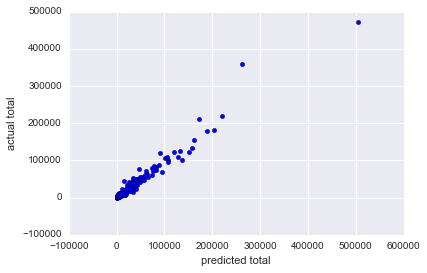

In [148]:
plt.scatter(y_test, predictions)
plt.ylabel("actual total")
plt.xlabel("predicted total")

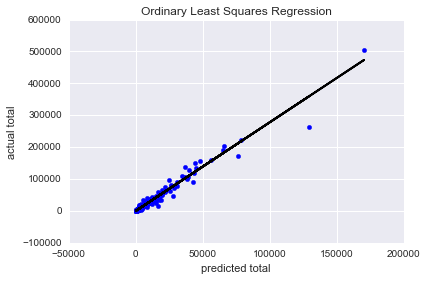

In [155]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, grid.predict(X_test), color='black',linewidth=2)
plt.title("Ordinary Least Squares Regression")
plt.ylabel("actual total")
plt.xlabel("predicted total")

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [137]:
#####The model best overall####
X = combined_3[["first"]]
y = combined_3["total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = linear_model.LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters)
gridmod = grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

print "r2: %s" %grid.best_score_
print "rmse : %s" % np.sqrt(mean_squared_error(y_test, predictions))

r2: 0.984913674257
rmse : 8345.35221157
